# **Supervised machine learning: chi-square**


In [ ]:
# Import libraries and modules

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# path

path = r"D:\0 - Data Analytics\6 - Advanced Analytics & Dashboard Design\UFC Analysis"

# import the dataframe

UFC_df = pd.read_csv(
    os.path.join(path, "02 Data", "Prepared Data", "UFC_cleaned_V2.csv")
)


## **Hypothesis 2: Weight Classes Affect Fight Finish Types** // Chi-Square
- **Null (H0):** The distribution of fight finish methods (**KO/TKO, submission, decision**) is **independent** of weight class.
- **Alternative (H1):** The distribution of finish methods **varies significantly** across different weight classes.

### Clean and select relevant columns for the Chi-squared

In [2]:
# Keep relevant columns
subset_df = UFC_df[["WeightClass", "Finish"]].dropna()

In [3]:
# Remove 'Unknown' and 'Overturned'
subset_df = subset_df[~subset_df["Finish"].isin(["Unknown", "Overturned"])]

In [4]:
# Map decisions and submissions, categorize all kind of decision as 'Decision'
finish_mapping = {
    "U-DEC": "Decision",
    "S-DEC": "Decision",
    "M-DEC": "Decision",
    "SUB": "Submission",
    "KO/TKO": "KO/TKO",
    "DQ": "DQ",
}

subset_df["Finish"] = subset_df["Finish"].map(finish_mapping)

In [5]:
# Create contingency table
contingency_table = pd.crosstab(subset_df["WeightClass"], subset_df["Finish"])

In [6]:
# Display the table
print("Contingency Table (Weight Class x Finish Type):")
display(contingency_table)

Contingency Table (Weight Class x Finish Type):


Finish,DQ,Decision,KO/TKO,Submission
WeightClass,,,,
Bantamweight,1,347,183,134
Catch Weight,0,28,15,14
Featherweight,1,393,209,126
Flyweight,1,183,83,65
Heavyweight,2,160,249,60
Light Heavyweight,0,183,221,83
Lightweight,2,512,319,217
Middleweight,4,321,287,141
Welterweight,5,496,310,167


In [7]:
# Chi-Square Test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {round(p_val, 4)}")


Chi-Square Test Results:
Chi-Square Statistic: 274.15
Degrees of Freedom: 36
P-value: 0.0


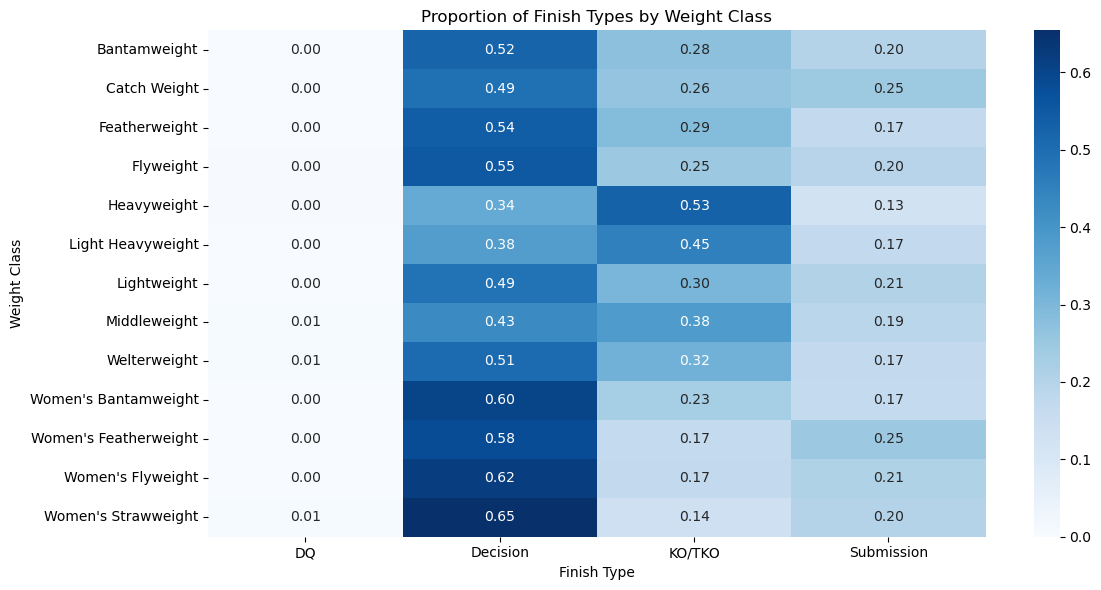

In [8]:
# Visualize proportions
contingency_table_normalized = contingency_table.div(
    contingency_table.sum(axis=1), axis=0
)

plt.figure(figsize=(12, 6))
sns.heatmap(contingency_table_normalized, cmap="Blues", annot=True, fmt=".2f")
plt.title("Proportion of Finish Types by Weight Class")
plt.xlabel("Finish Type")
plt.ylabel("Weight Class")
plt.tight_layout()
plt.show()

In [10]:
# save the heatmap
plt.savefig(
    os.path.join(
        path, "04 Analysis", "Visualizations", "FinishType_WeightClass_Chi-square.png"
    )
)

<Figure size 640x480 with 0 Axes>

### Research Question:
Is the distribution of fight outcomes (e.g., KO/TKO, Submission, Decision) independent of weight class?

### Statistical Test:
We conducted a **Chi-Square Test of Independence** between `WeightClass` and `Finish` type, after cleaning the `Finish` values:
- Grouped all decisions into a single `"Decision"` category
- Removed `"Unknown"` and `"Overturned"` outcomes

### Results:
- **Chi-Square Statistic:**: 274.15
- **P-value:**: 0.0 
→ We **reject the null hypothesis**.

### Interpretation:
There is a **statistically significant relationship** between a fighter's weight class and the way fights tend to end.

From the **heatmap**, we observe the following trends:
- **Heavier weight classes** (e.g., Heavyweight, Light Heavyweight) have **higher KO/TKO rates** (e.g., Heavyweight at 53% KO/TKO).
- **Lighter and women's divisions** show a **strong tendency toward decisions**—for instance:
  - Women’s Strawweight: 65% of fights end in a decision
  - Flyweight and Featherweight classes: over 50% decisions
- **Submissions** are relatively balanced but show higher frequency in certain classes like Catch Weight and Women’s Featherweight.

These patterns align with fighting dynamics—**heavier fighters often finish with power strikes**, while **lighter fighters emphasize speed, endurance, and technique**, leading to more decisions.

### Conclusion:
Finish type is **not randomly distributed** across weight classes. The variation is meaningful and likely influenced by physical attributes and fighting styles common in each division.

## **Hypothesis 3: Stance Mismatches Increase KO/TKO Likelihood**
- **Null (H0):** Stance mismatches (**Southpaw vs. Orthodox**) have **no effect** on KO/TKO finish rates.
- **Alternative (H1):** Fights with stance mismatches are significantly **more likely** to result in KO/TKO finishes compared to stance matches.

In [11]:
UFC_df = pd.read_csv(
    os.path.join(path, "02 Data", "Prepared Data", "UFC_cleaned_V2.csv")
)

In [12]:
# Filter necessary columns and drop rows with missing data
stance_df = UFC_df[["RedStance", "BlueStance", "Finish"]].dropna()

In [13]:
# Drop 'Unknown' and 'Overturned' finishes
stance_df = stance_df[~stance_df["Finish"].isin(["Unknown", "Overturned"])]


In [14]:
# Normalize Finish: mark KO/TKO as True, others as False
stance_df["KO_TKO"] = stance_df["Finish"].apply(lambda x: x == "KO/TKO")

In [15]:
# Create a new column: StanceMatch
stance_df["StanceMatch"] = stance_df.apply(
    lambda row: "Mismatch" if row["RedStance"] != row["BlueStance"] else "Same", axis=1
)

In [17]:
# Build contingency table
contingency = pd.crosstab(stance_df["StanceMatch"], stance_df["KO_TKO"])

# Display table
print("Contingency Table (Stance Match vs KO/TKO):")
display(contingency)

Contingency Table (Stance Match vs KO/TKO):


KO_TKO,False,True
StanceMatch,,
Mismatch,1645,840
Same,2634,1169


In [19]:
# Run chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"P-value: {round(p, 4)}")


Chi-Square Test Results:
Chi-Square Statistic: 6.35
P-value: 0.0117


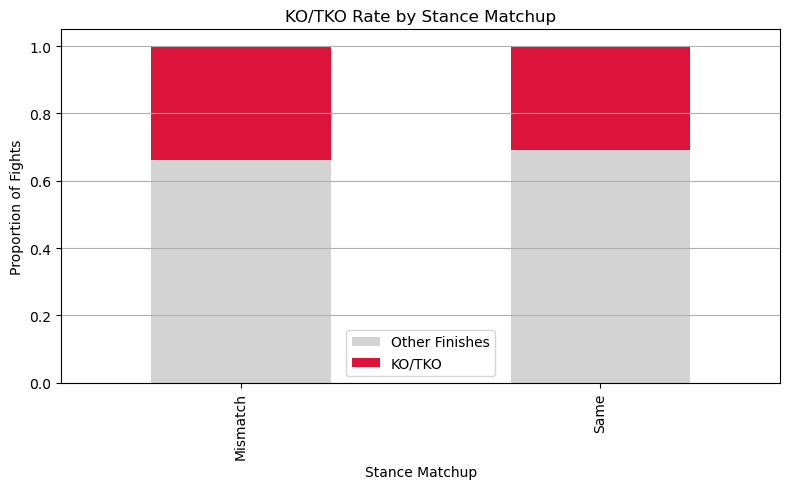

In [20]:
# Visualization
contingency_norm = contingency.div(contingency.sum(axis=1), axis=0)
contingency_norm.plot(
    kind="bar", stacked=True, color=["lightgray", "crimson"], figsize=(8, 5)
)
plt.title("KO/TKO Rate by Stance Matchup")
plt.ylabel("Proportion of Fights")
plt.xlabel("Stance Matchup")
plt.legend(["Other Finishes", "KO/TKO"])
plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [21]:
# save the bar plot
plt.savefig(
    os.path.join(
        path, "04 Analysis", "Visualizations", "KO_TKO_StanceMatch_Chi-square.png"
    )
)

<Figure size 640x480 with 0 Axes>

### Research Question:
Are fights between opponents with **different stances** (e.g., Southpaw vs Orthodox) more likely to end in a **KO/TKO** compared to fights where both fighters share the same stance?

### Statistical Test:
We conducted a **Chi-Square Test of Independence** between `StanceMatch` (Same vs Mismatch) and `Finish` (KO/TKO vs Other), after:
- Removing fights with `"Unknown"` or `"Overturned"` finish types
- Converting finish results into a binary variable: **KO/TKO** vs **Other outcomes**

### Results:
- **Chi-Square Statistic:** 6.35  
- **P-value:** 0.0117  
→ We **reject the null hypothesis**.

### Interpretation:
There is a **statistically significant relationship** between stance mismatches and KO/TKO finish rates.

From the stacked bar chart, we observe:
- Fights with **stance mismatches** show a **slightly higher proportion** of KO/TKO finishes compared to same-stance fights.
- Although visually the difference appears modest, the p-value confirms it is statistically meaningful.

This supports the idea that stance mismatches—such as Orthodox vs Southpaw—may influence striking angles, defense timing, and visibility, potentially increasing the likelihood of a knockout.

### Conclusion:
KO/TKO finishes are **not evenly distributed** between stance matchups. The data suggests that **stance mismatches contribute meaningfully to knockout outcomes**, even if the effect appears subtle in the plot.
